# import

`-` 코랩환경에서 아래 순서대로 진행해야 `ISLP` 패키지 설치시 오류가 발생하지 않는다.

1. 드라이브 마운트

2. 현재 작업중인 경로로 이동

3. 패키지 import

```python
from google.colab import drive
drive.mount('/content/drive')
```

```python
cd /content/drive/MyDrive/Colab Notebooks/ISLP/Linear Regression
```

In [1]:
#pip install ISLP

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ISLP import load_data

import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP.models import (ModelSpec as MS,
summarize,poly)

# 단순선형회귀

`-` 정의 : 한 개의 예측변수 $x$를 이용하여 반응변수 $y$를 예측하기 위한 모델링을 수행한다.

## 표현1

$$\hat {y} = \hat {\beta}_1x + \hat {\beta}_0$$

## 표현 2 ($\star\star\star$)

`-` 표현 2가 자주 쓰이니 잘 알아두자.

$$\bf \hat Y = X \hat {\boldsymbol{\beta}} = \begin{bmatrix}
1  & x_1 \\ 1 & x_2  \\ \dots & \dots \\  1  & x_n\end{bmatrix}\begin{bmatrix} \hat \beta_0  \\ \hat \beta_1 \end{bmatrix} $$

# Lab

## 데이터 로드

`-` 아래의 데이터를 살펴보자.

* `Boston data` :  보스턴 시의 주택 가격에 대한 데이터 정보
    * crim : 자치시 별 1인당 범죄율
    * zn : 25,000 평방피트르 초과하는 거주지역의 비율
    * indus : 비소매상업지역이 점유하고 있는 토지의 비율
    * chas : 찰스강에 대한 더미변수 (강의 경계에 위치한 경우는 1, 아니면 0)
    * nos : 10ppm당 농축 일산화 질소
    * rm : 주택 1가구당 평균 방의 개수
    * age : 1940년 이전에 건축된 소유주택의 비율
    * dis : 5개의 보스턴 직업센터까지의 접근성 지수
    * rad : 방사형 도로까지의 접근성 지수
    * tax : 10,000 달러 당 재산 세율
    * ptratio : 자치시별 학생/교사 비율
    * lstat : 모집단의 하위 계층의 비율
    * medv : 본인 소유의 주택가격(중앙값) (단위 : $ 1,000)

In [3]:
Boston = load_data("Boston")
Boston.columns
#len(Boston.columns)

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

## X,y 생성

$$\bf X = \begin{bmatrix}
1  & x_1 \\ 1 & x_2  \\ \dots & \dots \\  1  & x_n\end{bmatrix}$$

* `lstat` 변수를 예측변수로, `medv`변수를 반응변수로 사용

In [4]:
X = pd.DataFrame({"intercept" : np.ones(Boston.shape[0]),
                  "lstat" : Boston["lstat"]})
y = Boston["medv"]
X.head()

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33


`-` OLS : Ordinary Least Squares의 약자로, 주어진 데이터에서 오차의 제곱을 최소화하는 $\beta_i$를 추정한다.

In [5]:
model = sm.OLS(y,X)
results = model.fit()

In [6]:
s_result = summarize(results)

In [7]:
s_result

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


`-` 적합된 모델을 해석하면 다음과 같다.

$$\hat {\text{medv}} = -0.95 \times \text{lstat} + 34
.5538$$

## 시각화

In [8]:
x = Boston["lstat"]
yhat = results.predict()

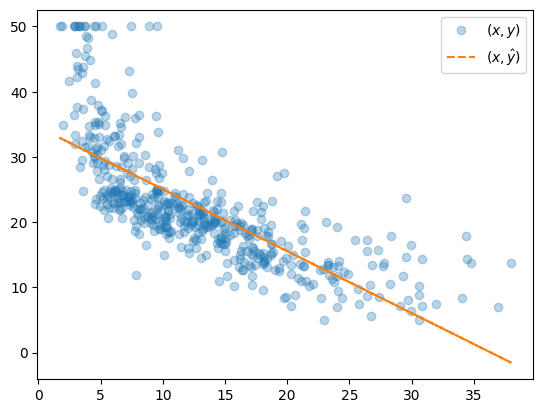

In [9]:
#| code-fold : true
plt.plot(x,y,"o",label = r"$(x,y)$",alpha=0.3)
plt.plot(x,yhat,"--",label = r"$(x,\hat {y})$")
plt.legend()

## ModelSpec() : $\bf X$를 선언하는 또 다른 방법

`-` 우리는 앞서 다음과 같은 module을 import 했다

```python
from ISLP.models import (ModelSpec as MS,
summarize,poly)
```

`-` ModelSpec이라는 모듈을 `MS`로 사용할 것으로 지칭

`-` 이 모듈은 예측변수 $x$를 컴퓨터가 이해할 수 있게끔 변환해준다.

`-` step1. 전달할 $x$를 다음과 같이 전달

In [10]:
design = MS(['lstat'])

`-` step2. 컴퓨터가 이해할 수 있는 형태에 맞게 $x$를 변환 $\to$ 주어진 $x$를 매트릭스 형태로 변환해줌

In [11]:
X = design.fit_transform(Boston)

In [12]:
X.head()

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33


### 모델 적합

In [13]:
model = sm.OLS(y, X)
results = model.fit()

### 모델 요약

In [14]:
report = results.summary()

In [15]:
report.tables[0]

Dep. Variable:,medv,R-squared:,0.544
Model:,OLS,Adj. R-squared:,0.543
Method:,Least Squares,F-statistic:,601.6
Date:,"Sun, 03 Sep 2023",Prob (F-statistic):,5.08e-88
Time:,19:16:47,Log-Likelihood:,-1641.5
No. Observations:,506,AIC:,3287.
Df Residuals:,504,BIC:,3295.
Df Model:,1,,
Covariance Type:,nonrobust,,


`-` 이런식으로 위의 표에 대한 데이터도 확인할 수 있음

In [16]:
report.tables[0].data

[['Dep. Variable:', 'medv', '  R-squared:         ', '   0.544'],
 ['Model:', 'OLS', '  Adj. R-squared:    ', '   0.543'],
 ['Method:', 'Least Squares', '  F-statistic:       ', '   601.6'],
 ['Date:', 'Sun, 03 Sep 2023', '  Prob (F-statistic):', '5.08e-88'],
 ['Time:', '19:16:47', '  Log-Likelihood:    ', ' -1641.5'],
 ['No. Observations:', '   506', '  AIC:               ', '   3287.'],
 ['Df Residuals:', '   504', '  BIC:               ', '   3295.'],
 ['Df Model:', '     1', '                     ', ' '],
 ['Covariance Type:', 'nonrobust', '                     ', ' ']]

`-` 추정된 회귀계수값 확인

In [17]:
results.params

intercept    34.553841
lstat        -0.950049
dtype: float64

### 모델 해석1 (모델의 유의성)

In [18]:
report.tables[0]

Dep. Variable:,medv,R-squared:,0.544
Model:,OLS,Adj. R-squared:,0.543
Method:,Least Squares,F-statistic:,601.6
Date:,"Sun, 03 Sep 2023",Prob (F-statistic):,5.08e-88
Time:,19:16:47,Log-Likelihood:,-1641.5
No. Observations:,506,AIC:,3287.
Df Residuals:,504,BIC:,3295.
Df Model:,1,,
Covariance Type:,nonrobust,,


`-` 결정계수 ($R^2$) 값을 살펴보니 약 54%의 설명력을 가진 모델이다.

`-` 또한, F통계량에 근거한 `p-value` 값을 살펴보았을 때 주어진 표본으로 부터 추출된 모형은 통계적으로 유의하다.

### 모델 해석2 (예측변수의 유의성)

In [19]:
report.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
intercept,34.5538,0.563,61.415,0.000,33.448,35.659
lstat,-0.9500,0.039,-24.528,0.000,-1.026,-0.874


`-` `lstat`의 coef $\to$ 즉, 회귀계수에 대한 유의성 검정결과

* `p-value`값을 살펴본 결과 유의수준 0.05에서 유의성을 만족한다. 따라서 `lstat`의 회귀계수는 통계적으로 유의하다.

### 시각화

In [20]:
yhat = results.predict()
x = X["lstat"]

`-` 적합된 $(x,\hat y)$와 $(x,y)$를 시각화한 결과 몇몇 이상치를 제외하고 잘 예측하고 있는것 같다.

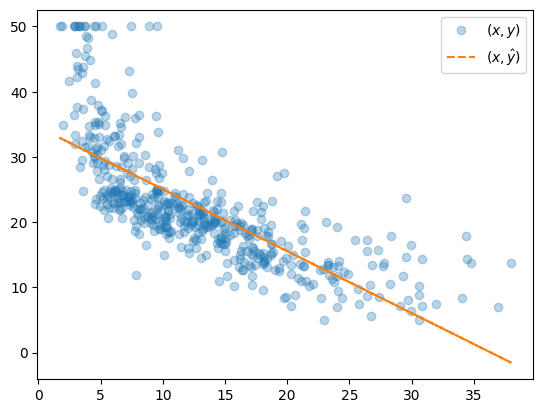

In [21]:
#| code-fold : true
plt.plot(x,y,"o",label = r"$(x,y)$",alpha=0.3)
plt.plot(x,yhat,"--",label = r"$(x,\hat {y})$")
plt.legend()

## test data에 대한 예측

`-` 임의의 데이터 생성

In [22]:
new_df = pd.DataFrame({'lstat':[5, 10, 15]})
newX = design.fit_transform(new_df)
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


`-` 예측

In [23]:
new_predictions = results.get_prediction(newX)
new_predictions.predicted_mean ## 예측값 확인

array([29.80359411, 25.05334734, 20.30310057])

`-` 예측값에 대한 신뢰구간 (유의수준 = 0.05)

In [24]:
new_predictions.conf_int(alpha=0.05)

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

`-` 예측값에 대한 예측구간 (유의수준 = 0.05)

In [25]:
new_predictions.conf_int(obs=True, alpha=0.05)

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

## `fitted value` vs `residual`

$$\text{resid} = y-\hat y$$

In [26]:
fv = results.fittedvalues ## 적합치
re = results.resid ## 잔차

In [27]:
from scipy import stats

Text(0.5, 1.0, 'qqplot')

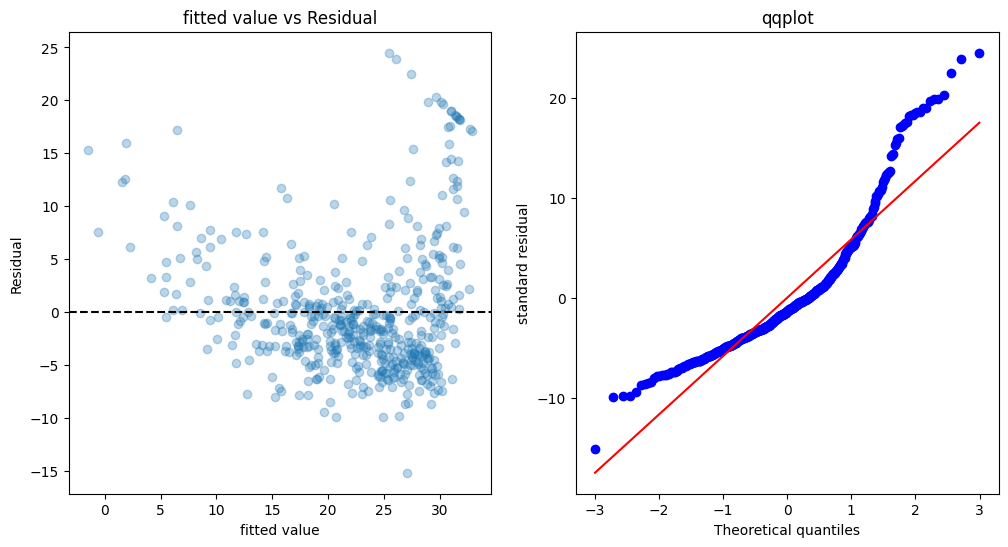

In [29]:
# code-fold : true
fig,axes = plt.subplots(1,2,figsize=(12,6))

ax1,ax2 = axes
ax1.plot(fv,re,"o",alpha=0.3)
ax1.axhline(0,c="k",ls ="--") ## c=k 검은색, ls= linestyle
ax1.set_xlabel("fitted value")
ax1.set_ylabel("Residual")
ax1.set_title("fitted value vs Residual")

_ = stats.probplot(re,plot=ax2)
ax2.set_ylabel("standard residual")
ax2.set_title("qqplot")

### 잔차 해석

* 잔차 plot을 살펴본 결과 : fitted value가 커질수록 잔차의 분산도 커지고 있다. $\to$ 잔차가 등분산성을 만족하지 못하고 있다.
    * 반응변수에 변환을 취하거나, 가중최소 제곱법을 이용해 해결해야한다.

* qqplot을 그려본결과 왼쪽 꼬리는 이론적으로 나와야할 값보다. 큰값을 가진다.

* 오른쪽 꼬리는 마찬가지이다.

* 즉, 잔차는 정규성 가정에 위배되는 것처럼 보인다.